Health Insurance Cross Sell Prediction

### 1. Research question

We want to predict whether a group of customers from past years will acquire the vehicle insurance policy provided by the company. 

In [3]:
%pip install imblearn
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------- ------ 245.8/294.9 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns

In [5]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv(r'C:\Users\paowm\Documents\DS Projects\train_class.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [9]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


### Check for missing values

In [12]:
null_value_count = df.isnull().sum().sum()
print(f"Number of nulls in df: {null_value_count}")

Number of nulls in df: 0


No missing values (nulls) found in the dataset.

### Check for duplicated rows

In [14]:
duplicate_rows = df.duplicated()

In [15]:
duplicate_rows.value_counts()

False    11504798
Name: count, dtype: int64

No duplicated rows found in the dataset.

### 1. EDA

###  Gender

<Axes: xlabel='Gender', ylabel='Count'>

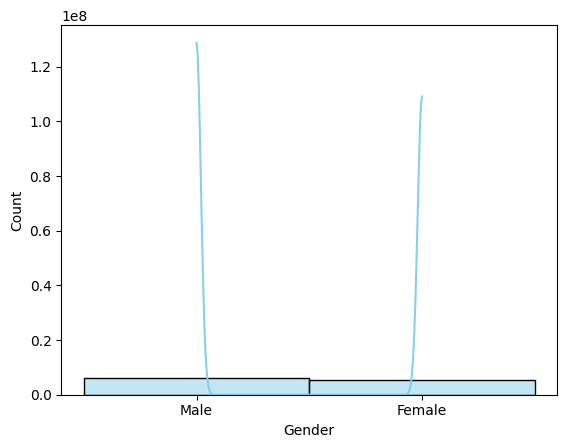

In [16]:
sns.histplot(data=df, x='Gender', kde=True, color="skyblue")

In [17]:
df['Gender'].value_counts()

Gender
Male      6228134
Female    5276664
Name: count, dtype: int64

### Age

<Axes: xlabel='Age', ylabel='Count'>

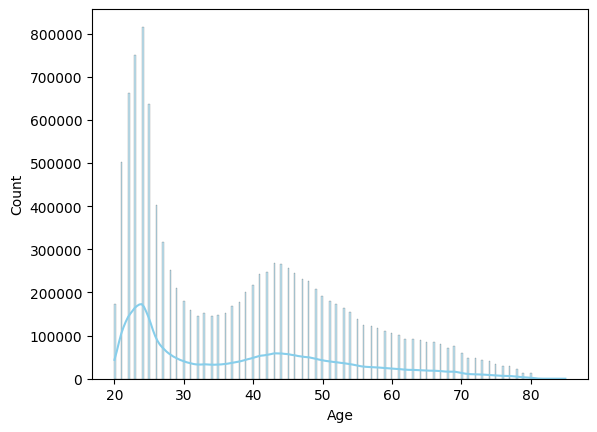

In [18]:
sns.histplot(data=df, x='Age', kde=True, color="skyblue")

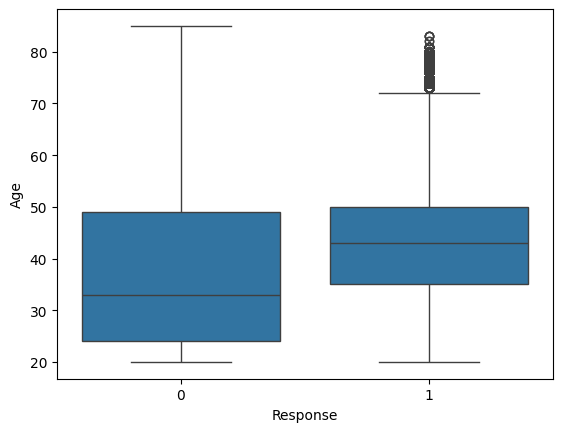

In [19]:
ax = sns.boxplot(x='Response', y='Age', data=df)

The boxplot above tells us that the median age of the customers that not acquired the vehicle insurance in past years is around 33-34 years old while the median age of the customers that did acquire is around 43-45. The plot also shows that customers that did not acquire the policy are spread between 20-80 year old while customers that did acquire the policy fall between 20-70 year old which makes sense since the older the people are, the less likely they are to drive and need an insurance policy. We can see some outliers present within the people that acquired the insurance policy between 70 and 80. 

### Driving_License

<Axes: xlabel='Driving_License', ylabel='Count'>

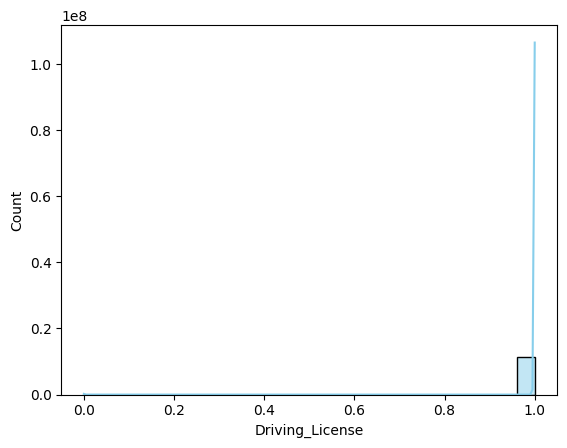

In [20]:
sns.histplot(data=df, x='Driving_License', kde=True, color="skyblue")

In [21]:
df['Driving_License'].value_counts()

Driving_License
1    11482041
0       22757
Name: count, dtype: int64

In our dataset, there are over 11M (99.8%) customers that have a driver's licence vs only 22K(0.2%) that did not have a driver's license.

### Region_Code

<Axes: xlabel='Region_Code', ylabel='Count'>

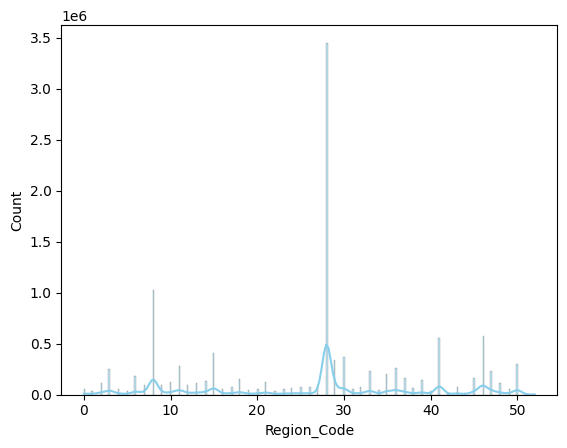

In [22]:
sns.histplot(data=df, x='Region_Code', kde=True, color="skyblue")

In [23]:
df['Region_Code'].value_counts()

Region_Code
28.0    3451062
8.0     1021036
46.0     578208
41.0     557581
15.0     403977
30.0     367307
29.0     338146
50.0     302334
11.0     278261
36.0     261946
3.0      246303
33.0     232387
47.0     229190
35.0     200035
6.0      181122
45.0     159292
37.0     158976
18.0     148548
39.0     138068
14.0     134585
21.0     126793
10.0     126081
2.0      118097
48.0     114230
13.0     108838
9.0       93371
7.0       92240
12.0      92142
27.0      78878
32.0      78797
43.0      75868
17.0      74533
26.0      71228
25.0      70556
24.0      69136
38.0      60587
0.0       59274
20.0      58765
31.0      58442
16.0      54905
23.0      54518
4.0       52504
49.0      50822
34.0      48685
19.0      44197
22.0      36932
5.0       36832
40.0      35888
1.0       33966
44.0      20305
42.0      13693
52.0       3450
51.0       1880
39.2          1
Name: count, dtype: int64

### Vehicle_Age

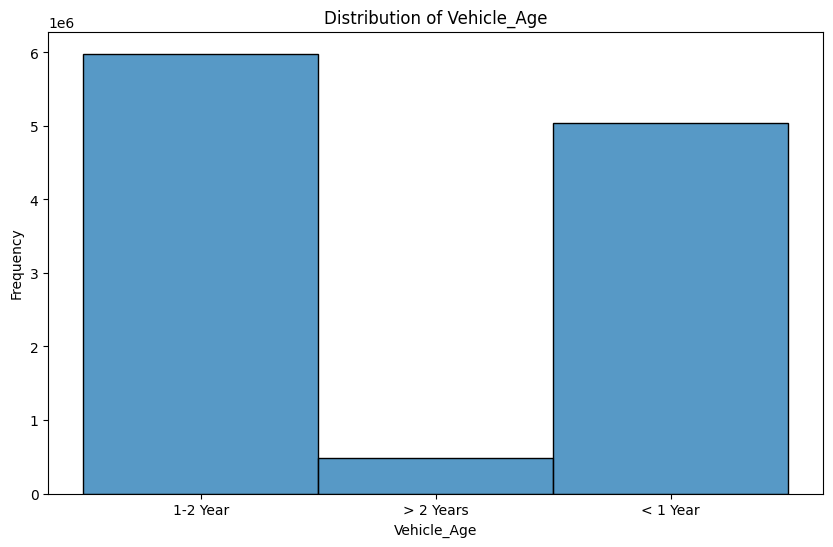

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

In [25]:
df['Vehicle_Age']. value_counts(normalize=True)

Vehicle_Age
1-2 Year     0.520016
< 1 Year     0.438438
> 2 Years    0.041546
Name: proportion, dtype: float64

95% of the vehicles in the study are 2 or less years old while 5% are older than 2 years old.

### Previously_Insured

<Axes: xlabel='Previously_Insured', ylabel='Count'>

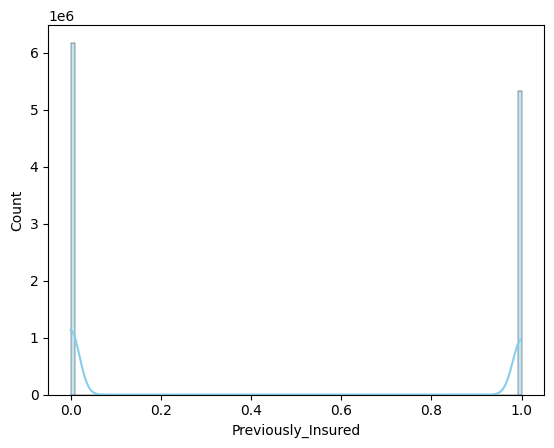

In [26]:
sns.histplot(data=df, x='Previously_Insured', kde=True, color="skyblue")

In [27]:
df['Previously_Insured'].value_counts(normalize=True)

Previously_Insured
0    0.537003
1    0.462997
Name: proportion, dtype: float64

Previously insured customers are 46% while the uninsured are 54%.

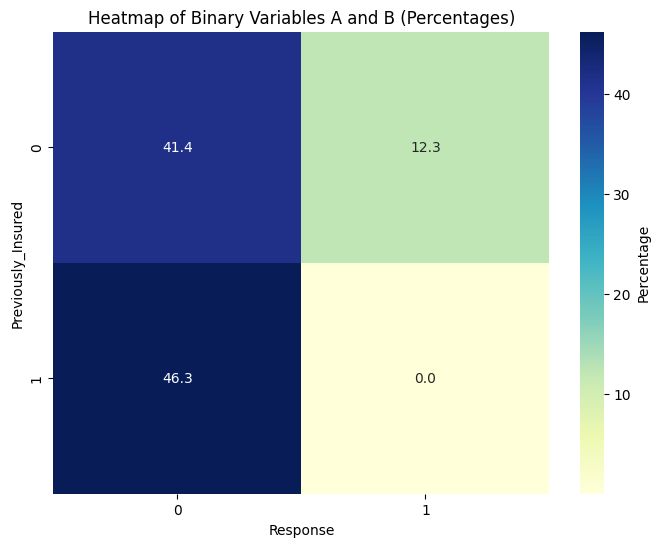

In [28]:
# Create the contingency table
contingency_table = pd.crosstab(df['Previously_Insured'], df['Response'])

# Calculate total observations
total = contingency_table.sum().sum()

# Convert to percentages
percentage_table = (contingency_table / total) * 100

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(percentage_table, annot=True, cmap="YlGnBu", fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Heatmap of Binary Variables A and B (Percentages)')
plt.xlabel('Response')
plt.ylabel('Previously_Insured')
plt.show()

From the heatmap above, we can see that it is more likely for customers not to acquire the insurance policy (around 88%) regardless if they had been previously insured or not. However, it is 12% more likely for customers to acquire the policy if they have not been previously insured than if they have been.

### Annual_Premium

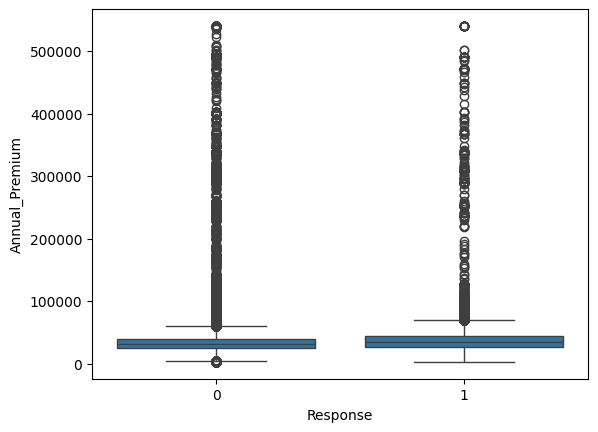

In [29]:
ax = sns.boxplot(x='Response', y='Annual_Premium', data=df)

In [30]:
medians = df.groupby('Response')['Annual_Premium'].median()
medians

Response
0    31611.0
1    34184.0
Name: Annual_Premium, dtype: float64

The Annual_Premium median for customers that acquired the policy is $3K larger than customers that did not get the policy, $34K vs $31K respectively.  

### Policy_Sales_Channel

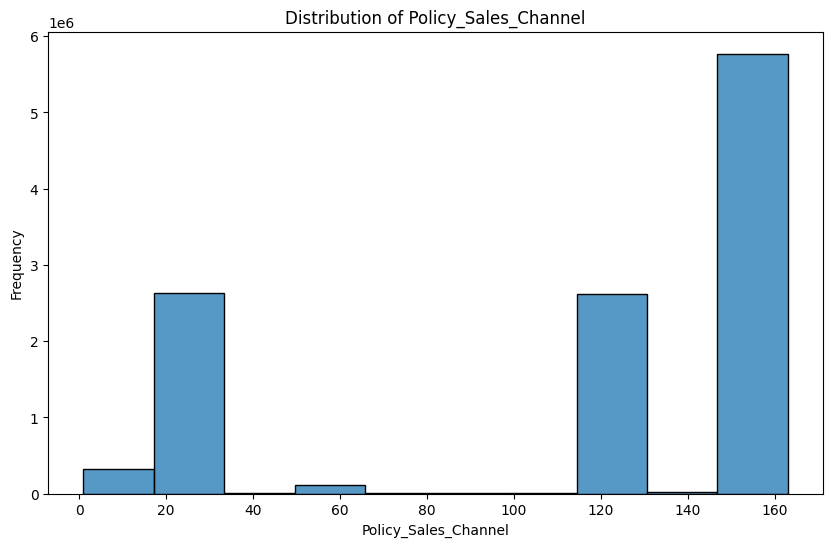

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Policy_Sales_Channel'], kde=False, bins=10)
plt.title('Distribution of Policy_Sales_Channel')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Frequency')
plt.show()

In [32]:
df['Policy_Sales_Channel'].value_counts(normalize=True)

Policy_Sales_Channel
152.0    3.621257e-01
26.0     2.115166e-01
124.0    1.968301e-01
160.0    5.566199e-02
156.0    2.752704e-02
             ...     
102.0    3.476810e-07
112.0    2.607608e-07
27.0     1.738405e-07
6.0      8.692026e-08
5.0      8.692026e-08
Name: proportion, Length: 152, dtype: float64

Most frequent Policy_sales_Channel are 152, 26 and 124 with 36%, 21% and 20% respectively.

### Response

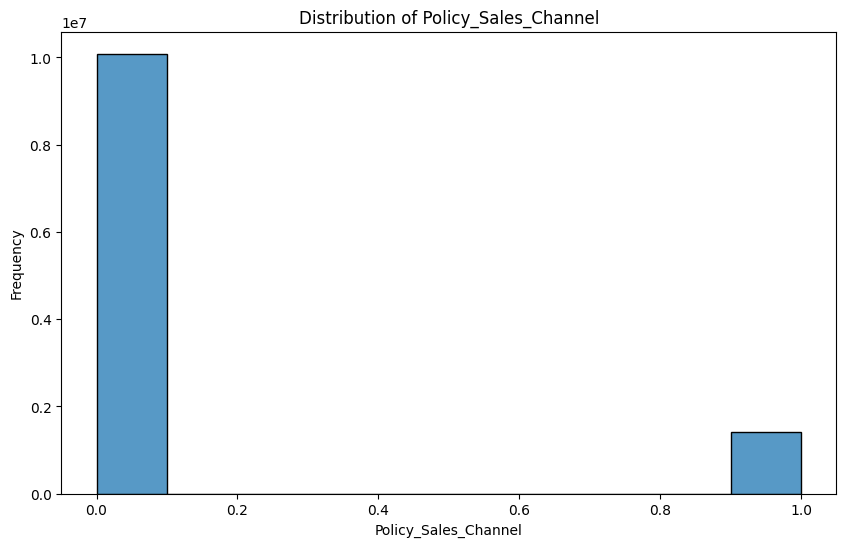

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Response'], kde=False, bins=10)
plt.title('Distribution of Policy_Sales_Channel')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Frequency')
plt.show()

In [35]:
df['Response'].value_counts(normalize=True)

Response
0    0.877003
1    0.122997
Name: proportion, dtype: float64

There is an imbalance in the target variable 'Response' which is an issue as predictions will be biased towards the majority class (Response = 0). We will treat the imbalance ahead with the SMOTE technique.

### Testing Dataset

In [37]:
df_test = pd.read_csv(r'C:\Users\paowm\Documents\DS Projects\test_class.csv')

In [38]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


### Data Preparation

In [39]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes('object').apply(lambda x:x.astype('category'))

In [40]:
def v_d(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0

In [41]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(v_d)
# df.drop(['Vehicle_Damage'],axis=1)

In [42]:
y_train = df['Response']

In [43]:
df.drop('Response', axis=1, inplace=True)

In [44]:
X_train = pd.get_dummies(data=df, drop_first=True)

In [46]:
null_value_test = df_test.isnull().sum().sum()
print(f"Number of nulls in df: {null_value_count}")

Number of nulls in df: 0


In [47]:
df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].apply(v_d)
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,0,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,1,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,1,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,0,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,0,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,1,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,0,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,0,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,1,38866.0,124.0,119


In [49]:
X_test = pd.get_dummies(data=df_test, drop_first=True)

In [50]:
df = pd.get_dummies(data=df, drop_first=True)

In [51]:
X_train.dtypes

id                         int64
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Gender_Male                 bool
Vehicle_Age_< 1 Year        bool
Vehicle_Age_> 2 Years       bool
Vehicle_Damage_1            bool
dtype: object

In [52]:
X_train['Gender_Male'].astype(int)
X_train['Vehicle_Age_< 1 Year'].astype(int)
X_train['Vehicle_Age_> 2 Years'].astype(int)   
X_train['Vehicle_Damage_1'].astype(int) 

0           1
1           1
2           0
3           1
4           0
           ..
11504793    1
11504794    1
11504795    0
11504796    1
11504797    0
Name: Vehicle_Damage_1, Length: 11504798, dtype: int64

In [53]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

Response
0    10089739
1     1415059
Name: count, dtype: int64

Response
0    10089739
1    10089739
Name: count, dtype: int64


### Initial Model

We will scale the numerical variables to balance the impact of every variable and reduce the outlier impact on our model. 

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
data_scaled = scaler.fit_transform(df)

#### Training and testing dataset split

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(14125634, 12) (14125634,) (6053844, 12) (6053844,)


In [56]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    print(x_test_pred)
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
    plt.show()


Accuracy_Score of LogisticRegression() model on Training Data is: 79.84411177579712
Accuracy_Score of LogisticRegression() model on Testing Data is: 79.86203476667056
Precision Score of LogisticRegression() model is: 0.7424656710955709
Recall Score of LogisticRegression() model is: 0.9143360409606834
AUC Score of LogisticRegression() model is: 0.86413807013408

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:
[0 1 0 ... 1 0 0]


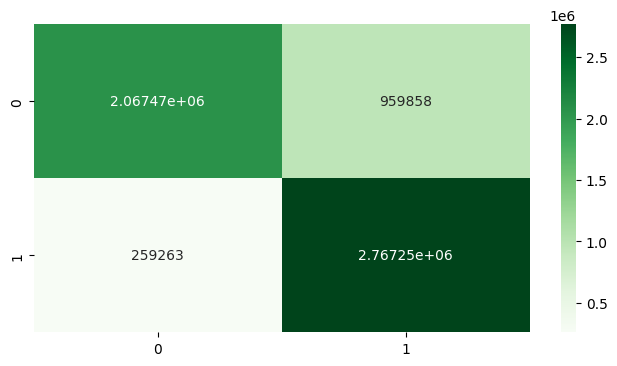

In [57]:
model_prediction(LogisticRegression())

The accuracy score of the model is 83% which measures how well our model is at predicting outcomes. In this case, this score is a meaningful metric as we corrected the imbalance. Also, the precision score is 80% which tells us how well our model predicts positive outcomes. This implies that 80 out of 100 positive outcomes are predicted correctly. 